In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in the data
df = pd.read_csv(r'D:\movies.csv') #adjust the location of the file according to where you store it

In [3]:
#Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In this project, we will dig in to find the correlation. It is interesting to know which variables have positive correlated to 

the gross avenue. Therefore, we can have the general visualisation on what factors contribute to the success/failure of a movie

In [5]:
#First, let's see if there is any missing data

#using for loop, loop through the columns to see if there are any missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing)) #for better output visualisation
    #looks like every single rows are filled in, so we dont have to worry

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


Now We Perform Some Basic Data Cleaning Techniques

In [6]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#now we want to specify which column we want to work on first and chage the data type of columns

df['budget']= df['budget'].astype('int64') #change it to integer
df['gross']= df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [8]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

Looking at the columns 'year' and 'released', we notice that the years in both columns should match, but unfortunately they are not always the case, so we'll fix this issue by taking the first part of the 'released' column (ie: the years) and input them into the new 'year' column

In [17]:
#create correct year column

df['yearcorrect']=df['released'].astype(str).str[8:]  #change data type and take the first 4
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  \
0      46998772.0               Warner Bros.    146.0   
1      58853106.0          Columbia Pictures    104.0   
2     538375067.0                  Lucasfilm    124.0   
3      83453539.0         Paramount Pictures     88.0   
4      39846344.0             Orion Pictures     98.0   
...           ...                        ...      ...   
7663          NaN                        NaN     90.0   
7664          NaN  Cactus Blue Entertainment     90.0   
7665          NaN           Embi Productions      NaN   
7666          NaN                        NaN    120.0   
7667          NaN                PK 65 Films    102.0   

                   yearcorrect  
0         1980 (United States)  
1         1980 (United States)  
2         1980 (United States)  
3         1980 (United States)  
4         1980 (United States)  
...                        ...  
7663  23, 2020 (United States)  
7664   7, 2020 (United States)  
7665         , 2020 (Cameroon)  
7666   1, 2020 (United States)  
7667   9, 2020 (United States)  

[7668 rows x 16 columns]

In [41]:
#order the table by the gross avenue
df=df.sort_values(by=['gross'],inplace=False, ascending=False)

In [20]:
pd.set_option('display.max_rows', None) #set the option to scroll the table for future convinience

See whether there are any duplicate values and drop them

In [23]:
#drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False) 



7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

Now, we will start to explore what variables are correlated to the "gross" variable. My hypothesis is budget and company will have the high correlation to gross. So I wil start to see whether my hypothesis was right, and then, I will test all other variables

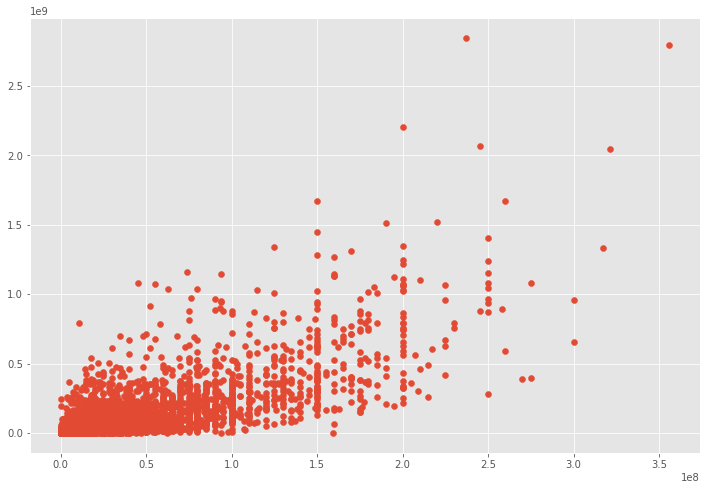

In [24]:
#First, we make the scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.show()
#however, it looks quite difficult to interpret it

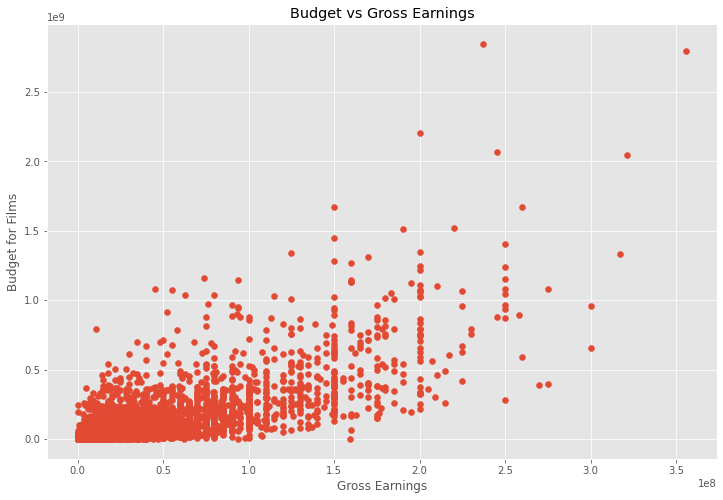

In [28]:
#to fix this..
#df.head()
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')
plt.show()


#Visualy, it seems like budget and gross are kind of correlated, but we need strong evidence

<AxesSubplot:xlabel='budget', ylabel='gross'>

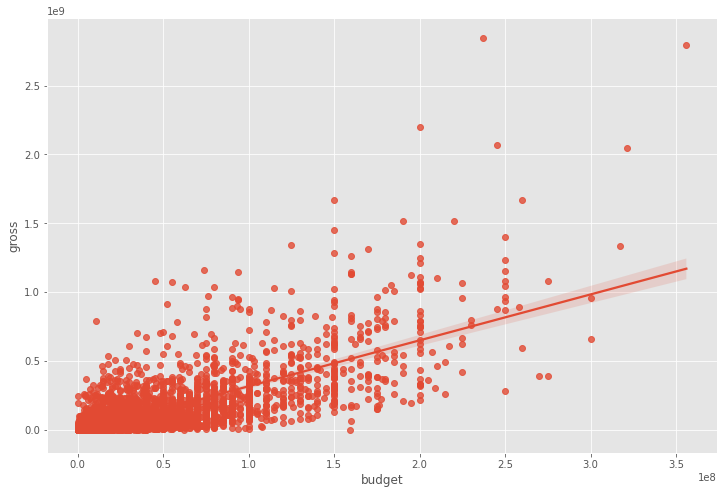

In [29]:
#Plot the budget vs gross using Seaborn

sns.regplot(x='budget',y='gross', data=df)
#look like the positive correlation

<AxesSubplot:xlabel='budget', ylabel='gross'>

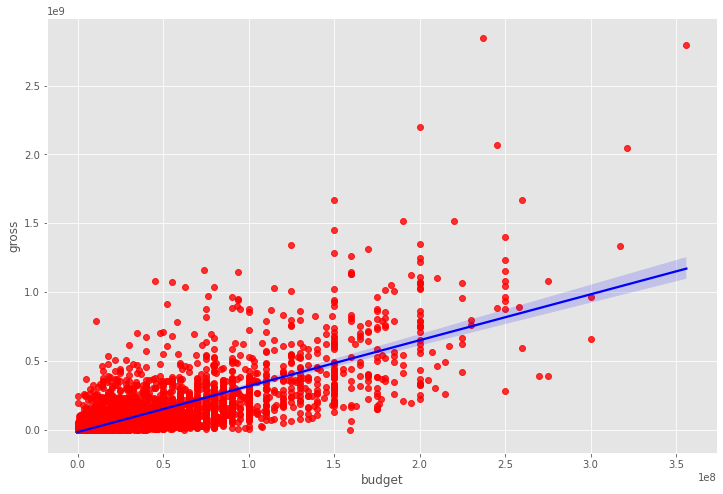

In [30]:
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

Let's start looking at correlation

In [32]:
df.corr(method='pearson') #we see the high correlation between budget and gross

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

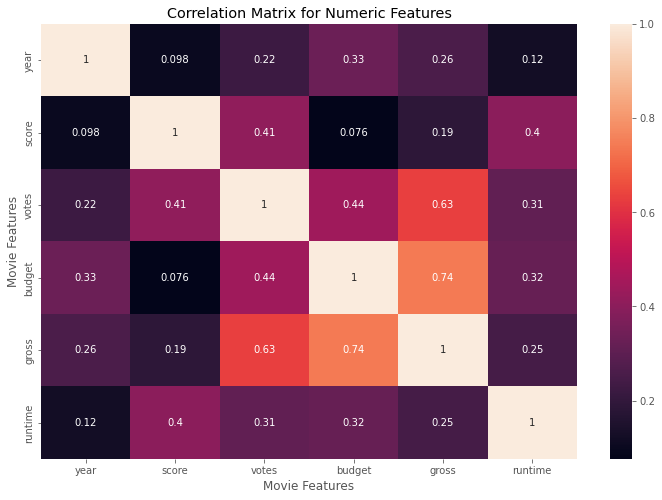

In [34]:
correlation_matrix=df.corr(method='pearson') #method can be changed to different correlation
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show() #lighter colour represent high correlation

In [35]:
#look at Company
df.head() #company is not numeric, and we want it to be numeric to idenify the correlation

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime                yearcorrect  
5445  2.847246e+09  Twentieth Century Fox    162.0   18, 2009 (United States)  
7445  2.797501e+09         Marvel Studios    181.0     , 2019 (United States)  
3045  2.201647e+09  Twentieth Century Fox    194.0   19, 1997 (United States)  
6663  2.069522e+09              Lucasfilm    138.0   18, 2015 (United States)  
7244  2.048360e+09         Marvel Studios    149.0     , 2018 (United States)

In [39]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

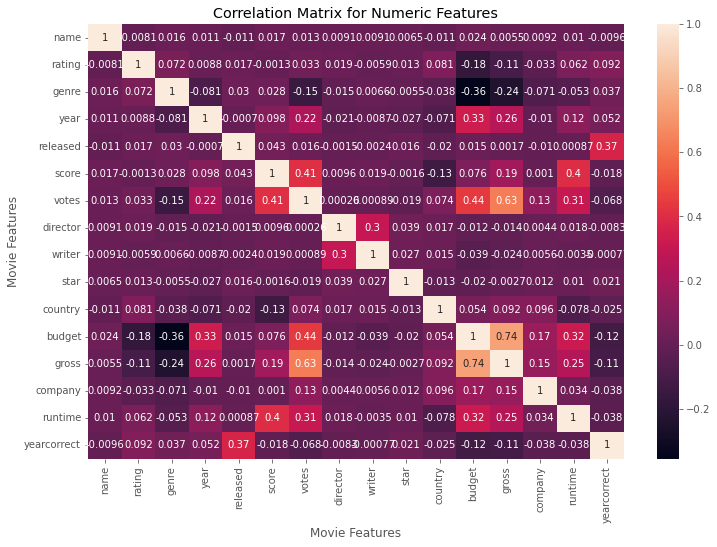

In [43]:
correlation_matrix=df_numerized.corr(method='pearson') 
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()
#as we can see, one of our prediction is Company has high correlation to gross is false

In [44]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross        0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect -0.009647  0.091844  0.037030  0.052072  0.367068 -0.018370   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget       0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross        0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
yearcorrect -0.067815 -0.008288 -0.000770  0.020887 -0.025423 -0.116834   

                gross   company   runtime  yearcorrect  
name         0.005533  0.009211  0.010392    -0.009647  
rating      -0.107339 -0.032943  0.062145     0.091844  
genre       -0.235650 -0.071067 -0.052711     0.037030  
year         0.257486 -0.010431  0.120811     0.052072  
released     0.001659 -0.010474  0.000868     0.367068  
score        0.186258  0.001030  0.399451    -0.018370  
votes        0.630757  0.133204  0.309212    -0.067815  
director    -0.014441  0.004404  0.017624    -0.008288  
writer      -0.023519  0.005646 -0.003511    -0.000770  
star        -0.002717  0.012442  0.010174     0.020887  
country      0.092129  0.095548 -0.078412    -0.025423  
budget       0.740395  0.173214  0.320447    -0.116834  
gross        1.000000  0.154840  0.245216    -0.108187  
company      0.154840  1.000000  0.034402    -0.038033  
runtime      0.245216  0.034402  1.000000    -0.037773  
yearcorrect -0.108187 -0.038033 -0.037773     1.000000

In [45]:
#we will organise this to see the highest correlation
correlation_mat=df_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.009647
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [46]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.356564
genre        budget        -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
yearcorrect  budget        -0.116834
budget       yearcorrect   -0.116834
yearcorrect  gross         -0.108187
gross        yearcorrect   -0.108187
rating       gross         -0.107339
gross        rating        -0.107339
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
votes        yearcorrect   -0.067815
yearcorrect  votes         -0.067815
runtime      genre         -0.052711
g

In [47]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#vote and budget have the highest correlation to gross earnings
#company has low correlation